# **Institution Reporting**


In [ ]:
pip install snowflake-connector-python==2.3.6 > /dev/null

In [ ]:
#read required information to connect to Snowflake database
from getpass import getpass
accountName = getpass('Enter Snowflake account name:')
userName = getpass('Enter Snowflake user name:')
password = getpass('Enter Snowflake password:')

databaseName = 'ipeds' #@param {type:"string"}
sourceSchema='Public'#@param {type:"string"} 
warehouseName = 'COMPUTE_WH'#@param{type:"string"}


Enter Snowflake account name:··········
Enter Snowflake user name:··········
Enter Snowflake password:··········


In [ ]:
# Source System to gather Statistics from
import snowflake.connector
import pandas as pd
from __future__ import print_function
from ipywidgets import interactive

import ipywidgets as widgets

# Gets the version
ctx = snowflake.connector.connect(
    user=userName,
    password=password,
    account=accountName,
    database=databaseName,
    warehouse=warehouseName    
    )
cs = ctx.cursor()

try:
sql = """
SELECT  
    CASE  TRIM(EB.DESCRIPTION)
              WHEN 'US Service schools' THEN 'US Service schools'
              WHEN 'New England CT ME MA NH RI VT'  THEN 'New England'
              WHEN 'Mid East DE DC MD NJ NY PA'  THEN 'Mid East'
              WHEN 'Great Lakes IL IN MI OH WI'  THEN 'Great Lakes'
              WHEN 'Plains IA KS MN MO NE ND SD'  THEN 'Plains'
              WHEN 'Southeast AL AR FL GA KY LA MS NC SC TN VA WV' THEN 'Southeast'
              WHEN 'Southwest AZ NM OK TX' THEN 'Southwest'
              WHEN 'Rocky Mountains CO ID MT UT WY'  THEN 'Rocky Mountains'
              WHEN 'Far West AK CA HI NV OR WA'  THEN 'Far West'
              WHEN 'Outlying areas AS FM GU MH MP PR PW VI' THEN 'Outlying areas' END "Economic Region"  
    ,CASE  
        WHEN  IC.DESCRIPTION   LIKE 'Degree-granting%associate%' THEN 'Associate degree granting'
        WHEN  IC.DESCRIPTION   LIKE 'Degree-granting%' THEN 'Degree granting'
        ELSE 'Non Degree granting' END "Education offering" 
    ,ICL.DESCRIPTION "Institution Type"
    ,IL.DESCRIPTION "Program Offering" 
    ,CASE INSTITUTIONHASHOSPITAL
        WHEN 1 THEN 'Yes'
        ELSE 'No' 
    END "Institute has hospital"
    ,CASE INSTITUTIONGRANTSMEDICALDEGREE
        WHEN 1  THEN 'Yes'
        ELSE 'No' 
    END "Institute grant Medical degree"
    ,1 "Count" 
    ,CITY "City"
    ,STATE "State Code"
FROM ACADEMICINSTITUTION
INNER JOIN ECONOMICBUREAUREGION EB ON EB.CODE=ECONOMICANALYSISREGIONS
INNER JOIN HIGHESTLEVELOFFERING HLO ON HLO.CODE = HIGHESTLEVELOFOFFERING
INNER JOIN INSTITUTIONALCATEGORY IC ON IC.CODE=INSTITUTIONALCATEGORY
INNER JOIN INSTITUTIONCONTROL ICL ON ICL.CODE=CONTROLOFINSTITUTION
INNER JOIN INSTITUTIONLEVEL IL ON IL.CODE=LEVELOFINSTITUTION
WHERE INSTITUTIONISACTIVE=1 AND HLO.CODE > 0 AND EB.CODE > 0; 
"""
  #print (sql)
  cs.execute(sql)
  records = cs.fetchall()
  names = [x[0] for x in cs.description]
  dfInst = pd.DataFrame(records,columns = names)
finally:
    cs.close()
    ctx.close()

In [ ]:
# Apply fiter and display the results
from IPython.display import HTML
HTML(dfInst.to_html(index=False))

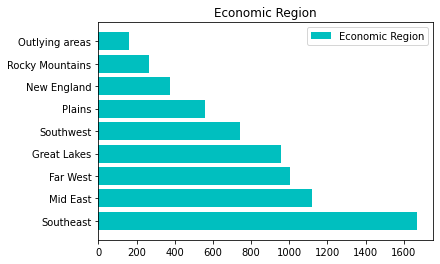

In [ ]:
import matplotlib.pyplot as plt
dfER = dfInst.groupby(['Economic Region'],as_index=False)['Count'].sum()
dfER = dfER.sort_values(by=['Count'],ascending=False)
x1 = list(dfER['Economic Region'])
y1 = list(dfER['Count'])
plt.barh(x1, y1, label="Economic Region", color='c')
plt.plot()

#plt.xlabel("bar height")
#plt.ylabel("bar number")
plt.title("Number of academic instittue by economic region")
plt.legend()
plt.show()

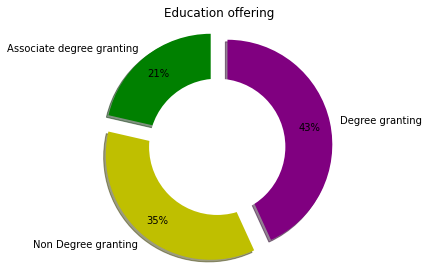

In [ ]:
# Education offering 
import matplotlib.pyplot as plt
dfER = dfInst.groupby(['Education offering'],as_index=False)['Count'].sum()
dfER = dfER.sort_values(by=['Count'],ascending=False)
labels = list(dfER['Education offering'])
sections = list(dfER['Count'])
colors = ['Purple', 'y', 'g']
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,explode = (0.1,0.1, 0.1),shadow=True,pctdistance=0.80,
        counterclock = False,
        autopct = '%1.0f%%');
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)

plt.axis('equal') # Try commenting this out.
plt.title('Number of academic institute split % by education offering')
plt.tight_layout()
plt.show()

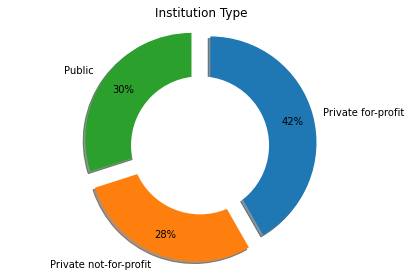

In [ ]:

# Institution Type.
import matplotlib.pyplot as plt
dfER = dfInst.groupby(['Institution Type'],as_index=False)['Count'].sum()
dfER = dfER.sort_values(by=['Institution Type'])
labels = list(dfER['Institution Type'])
sections = list(dfER['Count'])
colors = ['c', 'g', 'y']
plt.pie(sections, labels=labels, autopct='%0.f%%',counterclock = False,shadow=True, startangle=90, pctdistance=0.80, explode =(0.1,0.1,0.1),radius=1)
circle = plt.Circle((0,0),0.65,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.title('Institution Type')
plt.tight_layout()
plt.show()

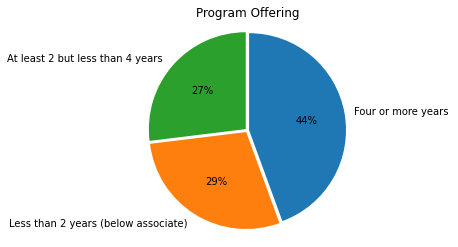

In [ ]:
# Program Offering.
import matplotlib.pyplot as plt
dfER = dfInst.groupby(['Program Offering'],as_index=False)['Count'].sum()
dfER = dfER.sort_values(by=['Count'],ascending=False)
labels = list(dfER['Program Offering'])
sections = list(dfER['Count'])
#colors = ['c', 'g', 'y']
#plt.pie(sections, labels=labels, colors=colors,
plt.pie(sections, labels=labels,startangle=90,explode = (0.02,0.02, 0.02),counterclock = False,autopct = '%1.0f%%');

plt.axis('equal') # Try commenting this out.
plt.title('Program Offering')
plt.show()